In [23]:
import numpy as np
import pandas as pd
import pickle
import sys
import os
import dsc
from dsc.query_engine import Query_Processor as dscQP
from dsc import dsc_io

import matplotlib
import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
from mpl_toolkits.axes_grid1 import make_axes_locatable
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

import utils

In [24]:
dsc_output = "/home/saikatbanerjee/scratch/work/gradvi-experiments/linreg_corr_init"
#dsc_fname  = os.path.basename(os.path.normpath(dsc_output))
dsc_fname = "linreg_corr_init"
db = os.path.join(dsc_output, dsc_fname + ".db")

print(db)

/home/saikatbanerjee/scratch/work/gradvi-experiments/linreg_corr_init/linreg_corr_init.db


In [25]:
target = ["simulate", "simulate.sfix", "simulate.pve", "simulate.se", "simulate.dims", "fit"]
#condition = ["simulate.sfix == 2", "simulate.signal == 'normal'", "simulate.dims == '(50, 200)'"]
#groups = ["fit_cpt:"]
condition = [""]

In [26]:
qp = dscQP(db, target, condition)
qp_df = qp.output_table
qp_df

,DSC,simulate,simulate.sfix,simulate.se:output,simulate.pve,simulate.output.file,simulate.dims,fit,fit.output.file
0,1,blockdiag,2,blockdiag/blockdiag_1,0.4,blockdiag/blockdiag_1,"(500,10000)",mr_ash,mr_ash/blockdiag_1_mr_ash_1
1,1,blockdiag,5,blockdiag/blockdiag_2,0.4,blockdiag/blockdiag_2,"(500,10000)",mr_ash,mr_ash/blockdiag_2_mr_ash_1
2,1,blockdiag,10,blockdiag/blockdiag_3,0.4,blockdiag/blockdiag_3,"(500,10000)",mr_ash,mr_ash/blockdiag_3_mr_ash_1
3,1,blockdiag,20,blockdiag/blockdiag_4,0.4,blockdiag/blockdiag_4,"(500,10000)",mr_ash,mr_ash/blockdiag_4_mr_ash_1
4,1,blockdiag,2,blockdiag/blockdiag_5,0.6,blockdiag/blockdiag_5,"(500,10000)",mr_ash,mr_ash/blockdiag_5_mr_ash_1
...,...,...,...,...,...,...,...,...,...
715,10,blockdiag,20,blockdiag/blockdiag_116,0.6,blockdiag/blockdiag_116,"(500,10000)",gradvi_compound_lasso_init,gradvi_compound_lasso_init/blockdiag_116_lasso...
716,10,blockdiag,2,blockdiag/blockdiag_117,0.8,blockdiag/blockdiag_117,"(500,10000)",gradvi_compound_lasso_init,gradvi_compound_lasso_init/blockdiag_117_lasso...
717,10,blockdiag,5,blockdiag/blockdiag_118,0.8,blockdiag/blockdiag_118,"(500,10000)",gradvi_compound_lasso_init,gradvi_compound_lasso_init/blockdiag_118_lasso...
718,10,blockdiag,10,blockdiag/blockdiag_119,0.8,blockdiag/blockdiag_119,"(500,10000)",gradvi_compound_lasso_init,gradvi_compound_lasso_init/blockdiag_119_lasso...


In [27]:
data = dsc_io.load_dsc(os.path.join(dsc_output, f"{qp_df['simulate.output.file'].values[2]}.pkl"))

In [28]:
data.keys()

dict_keys(['X', 'y', 'Xtest', 'ytest', 'n', 'p', 's', 'beta', 'se', 'DSC_DEBUG'])

In [29]:
data['Xtest'].shape

(1000, 10000)

In [30]:
btrue = data['beta']
xtest = data['Xtest']

In [31]:
bidx = np.where(btrue != 0)[0]
covx = np.cov(xtest.T, bias = True)

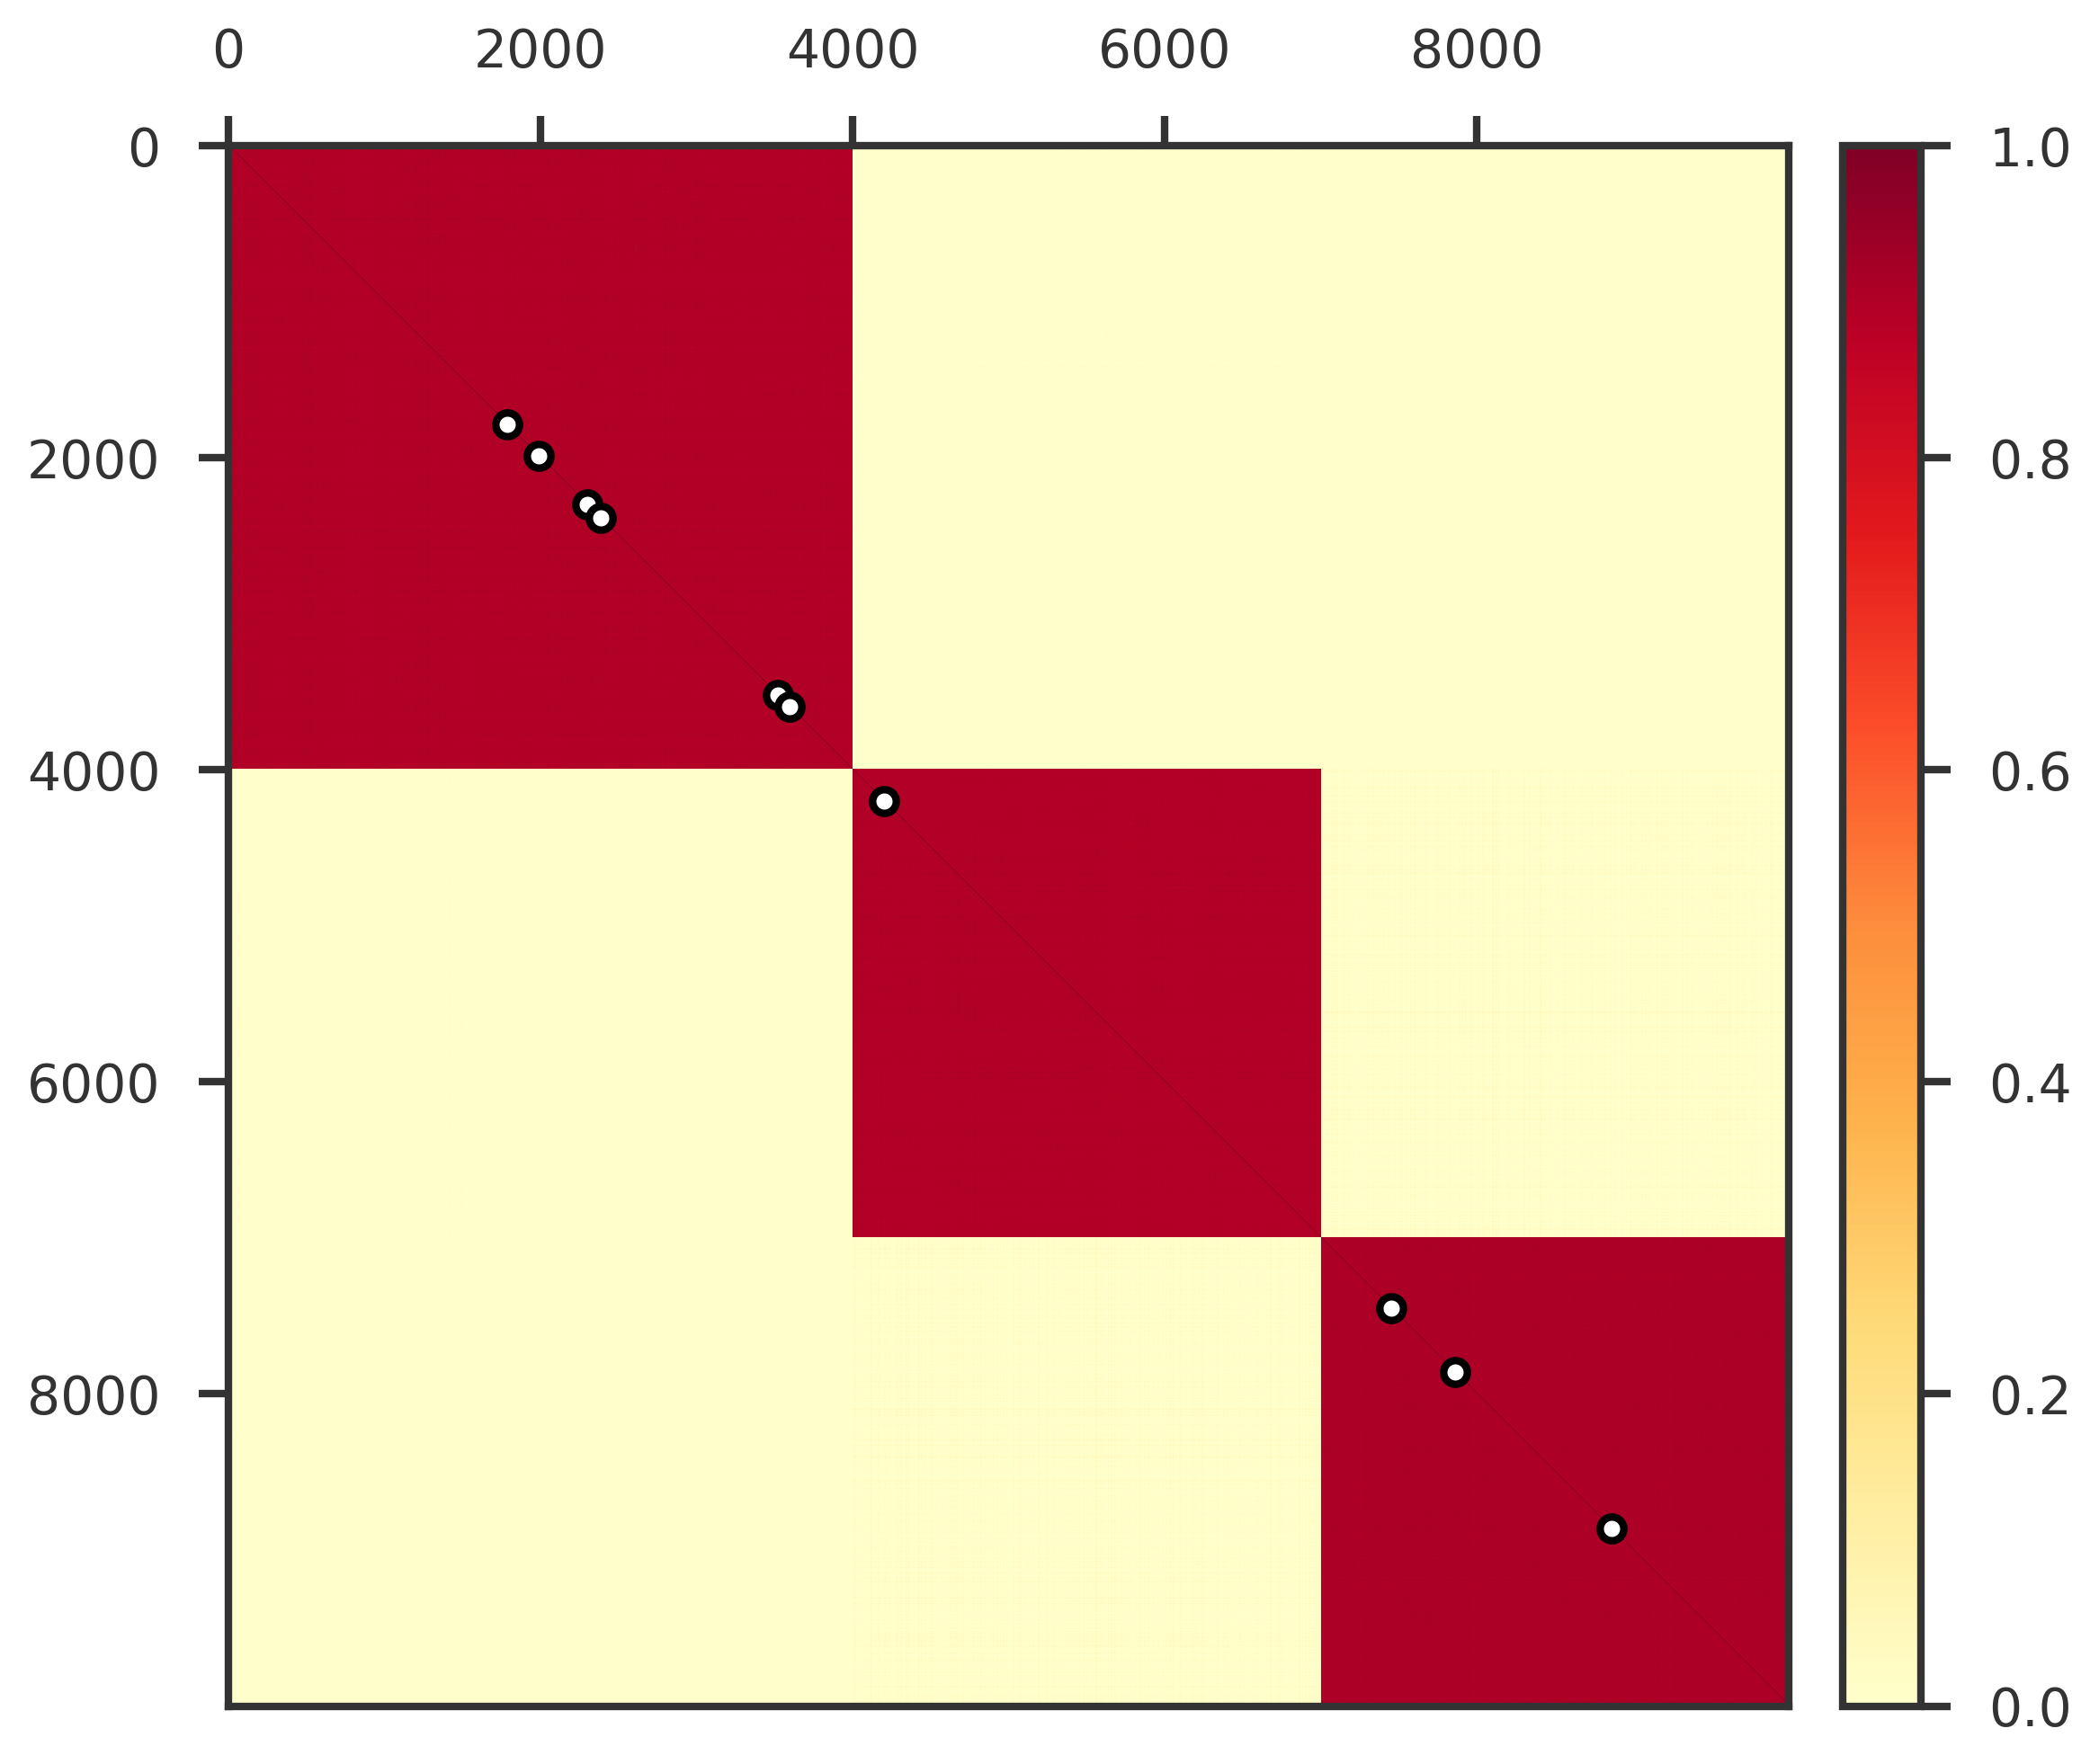

In [32]:
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)

cmap1 = matplotlib.cm.get_cmap("YlOrRd").copy()
cmap1.set_bad("w")

norm1 = matplotlib.colors.TwoSlopeNorm(vmin=0., vcenter=0.5, vmax=1.)
im1 = ax1.imshow(covx.T, cmap = cmap1, norm = norm1, interpolation='nearest', origin = 'upper')
# im1 = ax1.matshow(covx, cmap = cmap1, norm = norm1)
ax1.tick_params(bottom = False, top = True, left = True, right = False,
                labelbottom = False, labeltop = True, labelleft = True, labelright = False)

ax1.scatter(bidx, bidx, s = 40, edgecolor = 'black', facecolor = 'white', lw = 2)


divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = plt.colorbar(im1, cax=cax, fraction = 0.1)

plt.tight_layout()
utils.saveplot(fig, "predictors_covariance_matrix")
plt.show()